# Índices da Educação Brasileira no Ano de 2010

##### Integrantes: Guilherme Lorete Schmidt - 13676857 e Luana Hartmann Franco da Cruz - 13676350

# 1. Introdução
No cenário contemporâneo, a análise estatística dos índices educacionais no Brasil desempenha um papel crucial na compreensão da qualidade e eficácia do sistema educacional do país. A educação é um dos pilares fundamentais para o desenvolvimento social, econômico e cultural de uma nação, influenciando diretamente a formação de cidadãos e o progresso coletivo. Portanto, examinar de forma sistemática e estatística os indicadores educacionais torna-se imperativo para identificar tendências, desafios e oportunidades de melhoria.

Neste contexto, a análise estatística proporciona uma abordagem objetiva e baseada em evidências para avaliar diversos aspectos do sistema educacional brasileiro, focando-se nesta análise no acesso à escola dentre diferentes grupos populacionais. Ao coletar, organizar e interpretar dados quantitativos e qualitativos, é possível identificar padrões, correlações e disparidades que ajudam a informar políticas públicas, direcionar investimentos e promover a equidade no acesso à educação.

Além disso, a análise estatística permite uma comparação longitudinal e transversal dos índices educacionais, possibilitando acompanhar o progresso ao longo do tempo e fazer comparações entre diferentes redes de ensino e grupos demográficos. Essa perspectiva ampla e detalhada é essencial para uma avaliação abrangente e contextualizada do sistema educacional brasileiro, fornecendo insights valiosos para a formulação de estratégias e intervenções eficazes.

Portanto, este estudo se propõe a realizar uma análise estatística dos principais índices da educação brasileira, buscando entender os desafios enfrentados, as conquistas alcançadas e as áreas prioritárias para investimento e aprimoramento. Ao examinar indicadores como taxa de alfabetização, taxa de escolarização, desempenho em avaliações nacionais e acesso à educação de qualidade, pretendemos contribuir para o debate público e para o desenvolvimento de políticas educacionais mais eficientes e inclusivas.

# 2. Metodologia

## 2.1 Base de Dados

A base de dados a ser analisada foi obtida a partir do website do Instituto Brasileiro de Geografia e Estatística (IBGE), principal entidade brasileira em estatísticas sociais e econômicas gerais do país. A base de dados está disponível através do link https://www.ibge.gov.br/estatisticas/sociais/educacao/9662-censo-demografico-2010.html?edicao=9753&t=resultados.

Tais dados foram coletados pelo Instituto no Censo Demográfico de 2010, com o objetivo de identificar as características do povo brasileiro e revelar como vivem através de uma amostragem probabilística da mesma. A coleta das informações foi conduzida, em geral, através de entrevista presencial entre recenseadores e moradores. Todos os dados coletados passaram, no momento da entrevista, pelo processo de crítica eletrônica, cuja finalidade era eliminar inconsistências entre as informações dos diversos quesitos do questionário provenientes de equívocos ou não respostas durante a fase da coleta.

Segundo informações disponibilizadas pelo IBGE, a amostra do Censo 2010 teve cinco frações diferentes usadas de acordo com o total da população do município. Nos municípios com até 2.500 habitantes, a fração amostral foi de 50%, ou seja, em metade do total de domicílios foi aplicado o questionário da amostra. Os que tinham mais de 2.500 até 8.000 habitantes, tiveram a fração amostral de 33%. Nos municípios com mais de 8.000 até 20.000 habitantes, a fração foi de 20%. Já nos que tinham mais de 20.000 até 500 mil habitantes, a fração foi de 10%. E, por fim, nos municípios com população maior que 500 mil, a fração foi de 5%.

Portanto, a partir da base de dados disponibilizada pelo IBGE em formato `.xls` e `.xlsx`, foram selecionados dados que permitam relacionar as variáveis `sexo`, `cor ou raça`, `frequência escolar`, `idade` e `renda`, de forma a obter-se um panorama geral do acesso ao ambiente escolar em relação a diferentes setores da população brasileira. Sendo assim, os dados foram analizados em grande parte através da biblioteca `pandas` e graficadas através da `matplotlib`, ambas nativas à linguagem de programação `Python`. Demais bibliotecas podem ser encontradas abaixo.

In [1]:
import numpy as np
import matplotlib
import time
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd

In [34]:
# planilha censo demográfico 2010 educação por sexo, idade
tab1 = pd.read_excel('tab1_1_1.xlsx', skiprows=8)

# planilha censo demográfico 2010 educação por cor ou raça
tab2 = pd.read_excel('tab1_1_2.xls', skiprows=6)

# planilha censo demográfico 2010 educação por rendimento nominal per capita
tab3 = pd.read_excel('tab1_1_3.xlsx', skiprows=6)

## Definição de variáveis

Primeiramente, as variáveis devem ser devidamente identificadas e agrupadas de acordo com suas características, dividindo-se entre _qualitativas_, categorizando dados, ou _quantitativas_, quantificando dados. Ainda assim, _variáveis qualitativas_ podem ainda ser subdivididas entre _nominais_, quando trata de categorias sem ordem aparente entre elas, ou _ordinais_, se trata de categorias que possuem uma ordem. O mesmo vale para _variáveis quantitativas_, que podem ser subdividas entre _discretas_, quando tratam de valores individuais discretizados, e _continuas_, se caracterizam quantias que podem ser descritas de forma contínua.

A partir dessa descrição, detalham-se as variáveis para avaliação posterior:
- Sexo: traz as categorias de masculino e feminino;
- Cor ou Raça: dividide-se entre diversas categorias étnicas da população brasileira;
- Frequência escolar: descreve se um dado habitante frequenta, já fequentou, ou nunca frequentou o ambiente escolar;
- Idade: traz a idade (discretizada em anos) dos habitantes;
- Renda: traz a renda dos habitantes (discretizada em frações de salários mínimos).

Portanto, dadas estas características, traz-se abaixo uma classificação das variáveis em formato de tabela:

| Nome                | Variável     | Tipo      |
|:--------------------|:------------:|:---------:|
| `sexo`              | qualitativa  | nominal   |
| `cor ou raça`       | qualitativa  | nominal   |
| `situação escolar`  | qualitativa  | ordinal   |
| `idade`             | quantitativa | discreta  |
| `renda`             | quantitativa | discreta  |

# 3. Resultados

## 3.2 Tabelas de frequência e análise preliminar

### 3.1.1 Sexo

Com um espaço amostral contendo toda a população brasileira, comecemos trazendo uma tabela de frequências de cada sexo em relação à população total.

In [60]:
# População total brasileira
total_pop = tab1.iloc[0:14, 1]
total_homem = tab1.iloc[15:29, 1]
total_mulher = tab1.iloc[30:44, 1]

# Prepara tabela proposta
tabela = [['Sexo', 'Total', 'Frequência (%)'],['Masculino'],['Feminino']]
tabela[1].append(int(np.sum(total_homem)))
tabela[1].append(np.sum(total_homem) / np.sum(total_pop) * 100)
tabela[2].append(int(np.sum(total_mulher)))
tabela[2].append(np.sum(total_mulher) / np.sum(total_pop) * 100)

print(tabulate(tabela, headers='firstrow', tablefmt="fancy_grid", intfmt="", colalign=(["center"]*3)))

╒═══════════╤══════════╤══════════════════╕
│   Sexo    │  Total   │  Frequência (%)  │
╞═══════════╪══════════╪══════════════════╡
│ Masculino │ 93406989 │     48.9668      │
├───────────┼──────────┼──────────────────┤
│ Feminino  │ 97348808 │     51.0332      │
╘═══════════╧══════════╧══════════════════╛


A partir da tabelas, vê-se que os dados confirmam estatísticas já conhecidas acerca da população brasileira, destacando a maior presença de habitantes do sexo feminino que do sexo masculino.

### 3.1.2 Cor ou Raça
É de grande importância se analizar o impacto de cor ou raça sobre a educação, com vistas à criação de políticas públicas direcionadas à universalização do ensino. Portanto, será trazido abaixo as frequências gerais de cada cor ou raça sobre a população brasileira.

In [49]:
# População total brasileira
cor_total = [tab2.iloc[0:12, x] for x in range(2, 8)]

# Prepara tabela proposta
tabela = [['Cor ou Raça', 'Total', 'Frequência (%)'],['Branca'],['Preta'],['Amarela'],['Parda'],['Indígena'],['Sem Declaração']]

for x in range(0,6):
    tabela[x+1].append(int(np.sum(cor_total[x])))
    tabela[x+1].append(np.sum(cor_total[x]) / np.sum(total_pop) * 100)

print(tabulate(tabela, headers='firstrow', tablefmt="fancy_grid", colalign=(["center"]*3)))

╒════════════════╤══════════╤══════════════════╕
│  Cor ou Raça   │  Total   │  Frequência (%)  │
╞════════════════╪══════════╪══════════════════╡
│     Branca     │ 90621281 │     47.5064      │
├────────────────┼──────────┼──────────────────┤
│     Preta      │ 14351162 │     7.52332      │
├────────────────┼──────────┼──────────────────┤
│    Amarela     │ 2105352  │     1.10369      │
├────────────────┼──────────┼──────────────────┤
│     Parda      │ 82820451 │      43.417      │
├────────────────┼──────────┼──────────────────┤
│    Indígena    │  821500  │     0.430656     │
├────────────────┼──────────┼──────────────────┤
│ Sem Declaração │  36050   │     0.018899     │
╘════════════════╧══════════╧══════════════════╛


Como é possível visualizar na tabela de frequências, o grupo de maior presença na população brasileira é o de cor ou raça "Branca", seguido logo atrás pela "Parda". Por outro lado, vê-se que o grupo menos presente é o de indígenas. Nas seções posteriores, tal variável será importante ao analisar a influência desta sobre a frequência escolar.

### 3.1.3 Frequência Escolar

Uma das principais estatísticas ao se analisar o panorama educacional brasileiro é a frequência escolar. Portanto, traremos aqui uma tabela de frequências relacionando o percentual populacional em cada categoria, além de um gráfico de setores que a representa.

╒══════════════════════╤═══════════╤══════════════════╕
│  Frequência Escolar  │   Total   │  Frequência (%)  │
╞══════════════════════╪═══════════╪══════════════════╡
│      Frequenta       │ 59565188  │     31.2259      │
├──────────────────────┼───────────┼──────────────────┤
│    Já frequentou     │ 112465161 │     58.9577      │
├──────────────────────┼───────────┼──────────────────┤
│   Nunca frequentou   │ 18725449  │     9.81645      │
╘══════════════════════╧═══════════╧══════════════════╛


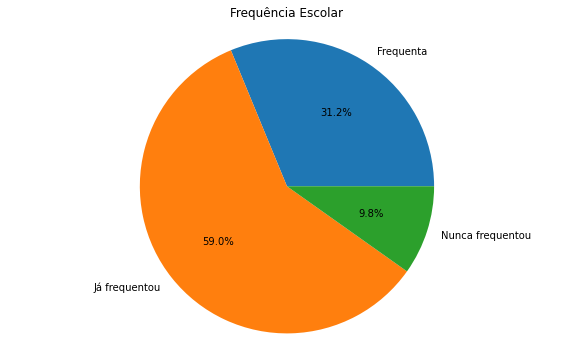

In [59]:
# População total brasileira
freq_pop = tab1.iloc[0:14, 2]
jafreq_pop = tab1.iloc[0:14, 3]
nfreq_pop = tab1.iloc[0:14, 4]

# Prepara tabela proposta
tabela = [['Frequência Escolar', 'Total', 'Frequência (%)'],['Frequenta'],['Já frequentou'],['Nunca frequentou']]
tabela[1].append(int(np.sum(freq_pop)))
tabela[1].append(np.sum(freq_pop) / np.sum(total_pop) * 100)
tabela[2].append(int(np.sum(jafreq_pop)))
tabela[2].append(np.sum(jafreq_pop) / np.sum(total_pop) * 100)
tabela[3].append(int(np.sum(nfreq_pop)))
tabela[3].append(np.sum(nfreq_pop) / np.sum(total_pop) * 100)

print(tabulate(tabela, headers='firstrow', tablefmt="fancy_grid", intfmt="", colalign=(["center"]*3)))

# Prepara gráfico de setores
plt.figure(figsize=(10, 6))
plt.pie([np.sum(freq_pop), np.sum(jafreq_pop), np.sum(nfreq_pop)], autopct='%1.1f%%', labels=['Frequenta','Já frequentou','Nunca frequentou'])
plt.title('Frequência Escolar')
plt.axis('equal')
plt.show()

A partir da tabela e do gráfico, vê-se que grande parte da população (59.0%) já frequentou a escola, fato condizente com a população adulta brasileira, mas que deve ser analisado mais a fundo. Igualmente, 31.2% da população frequenta a escola, o que muito provavelmente corresponde à parcela da população em idade escolar. No entanto, 9.8% da população nunca frequentou a escola, indicando uma dado preocupante de falha no acesso ao ambiente escolar.

### 3.1.4 Idade
Idade é um dado de grande influência sobre a relação do habitante com o ambiente escolar. Portanto, uma análise preliminar desta através de uma tabela de frequências é aqui construída.

In [57]:
# Prepara tabela proposta
tabela = [['Idade', 'Total', 'Frequência (%)'],['0 a 3 anos'],['4 anos'],['5 anos'],['6 anos'],['7 a 9 anos'],['10 a 14 anos'],['15 a 17 anos'],['18 a 19 anos'],['20 a 24 anos'],['25 a 29 anos'],['30 a 39 anos'],['40 a 49 anos'],['50 a 59 anos'],['60 ou mais anos']]

for x in range(0,14):
    tabela[x+1].append(int(total_pop[x]))
    tabela[x+1].append(total_pop[x] / np.sum(total_pop) * 100)

print(tabulate(tabela, headers='firstrow', tablefmt="fancy_grid", intfmt="", colalign=(["center"]*3)))

╒═════════════════╤══════════╤══════════════════╕
│      Idade      │  Total   │  Frequência (%)  │
╞═════════════════╪══════════╪══════════════════╡
│   0 a 3 anos    │ 10938913 │     5.73451      │
├─────────────────┼──────────┼──────────────────┤
│     4 anos      │ 2867819  │      1.5034      │
├─────────────────┼──────────┼──────────────────┤
│     5 anos      │ 2933763  │     1.53797      │
├─────────────────┼──────────┼──────────────────┤
│     6 anos      │ 2891614  │     1.51587      │
├─────────────────┼──────────┼──────────────────┤
│   7 a 9 anos    │ 9142389  │     4.79272      │
├─────────────────┼──────────┼──────────────────┤
│  10 a 14 anos   │ 17167135 │     8.99954      │
├─────────────────┼──────────┼──────────────────┤
│  15 a 17 anos   │ 10353865 │     5.42781      │
├─────────────────┼──────────┼──────────────────┤
│  18 a 19 anos   │ 6632922  │     3.47718      │
├─────────────────┼──────────┼──────────────────┤
│  20 a 24 anos   │ 17240863 │     9.03819      │


Vê-se uma grande heterogeneidade sobre a distribuição brasileira dentre esse espectro de idades, dado pela pirâmide etária brasileira. Portanto, em análises futuras envolvendo idades, o número de pessoas em uma dada idade será tratado de forma percentual, de forma que ainda seja possível enxergar padrões dentre a população.

### 3.1.5 Renda
Renda também constitui um fator de grande influência sobre o acesso à educação. Desse modo, traz-se novamente uma análise preliminar de tal informação.

In [61]:
# População total brasileira
renda_total = [tab3.iloc[0:12, x] for x in range(2, 10)]

# Prepara tabela proposta
tabela = [['Renda', 'Total', 'Frequência (%)'],['Sem renda'],["Até 1/4"], ["1/4 a 1/2"], ["1/2 a 1"], ["1 a 2"], ["2 a 3"], ["3 a 5"], ["Mais de 5"]]

for x in range(0,8):
    tabela[x+1].append(int(np.sum(renda_total[x])))
    tabela[x+1].append(np.sum(renda_total[x]) / np.sum(total_pop) * 100)

print(tabulate(tabela, headers='firstrow', tablefmt="fancy_grid", colalign=(["center"]*3)))

╒═══════════╤══════════╤══════════════════╕
│   Renda   │  Total   │  Frequência (%)  │
╞═══════════╪══════════╪══════════════════╡
│ Sem renda │ 7039630  │     3.69039      │
├───────────┼──────────┼──────────────────┤
│  Até 1/4  │ 23802968 │     12.4782      │
├───────────┼──────────┼──────────────────┤
│ 1/4 a 1/2 │ 35029585 │     18.3636      │
├───────────┼──────────┼──────────────────┤
│  1/2 a 1  │ 52066691 │     27.2949      │
├───────────┼──────────┼──────────────────┤
│   1 a 2   │ 40481415 │     21.2216      │
├───────────┼──────────┼──────────────────┤
│   2 a 3   │ 12973764 │     6.80124      │
├───────────┼──────────┼──────────────────┤
│   3 a 5   │ 9428422  │     4.94267      │
├───────────┼──────────┼──────────────────┤
│ Mais de 5 │ 8939342  │     4.68628      │
╘═══════════╧══════════╧══════════════════╛


Analisando-se os dados de renda, vê-se uma concentração de pessoas no intervalo de renda entre 1/2 e 1 salário mínimo, enquanto o menor número de pessoas encontra-se na categoria "Sem renda". No entanto, nota-se que a maior parte da população possui renda inferior a 1 salário mínimo. Estudaremos os impatos de tal fato sobre a educação.

## 3.2 Medidas Resumo

Caracterizados os dados que serão empregados na análise, descreveremos agora relações entre os demais dados e o percentual populacional em uma dada classe de frequência escolar, de forma a caracterizar seus impactos sobre a educação da população pertencente à categoria descrita pelo dado.

De modo a iniciar a análise, calcularemos primeiramente as medidas resumo dos dados obtidos, manifestando-se através da média, desvio padrão, 1º quartil, mediana, 3º quartil e máximo de cada uma. Portanto, segue a análise.

### 3.2.1 Relação entre sexo e frequência escolar 

Abaixo são calculadas as medidas resumo para o percentual da população que frequenta a escola.

In [3]:
# Percentual da população que frequenta a escola
freq_pop = tab1.iloc[0:14, 2] / total_pop * 100
freq_homem = tab1.iloc[15:29, 2] / total_homem * 100
freq_mulher = tab1.iloc[30:44, 2] / total_mulher * 100

# Calcular estatísticas descritivas para cada categoria
desc_freq_pop = freq_pop.describe(exclude='category')
desc_freq_homem = freq_homem.describe()
desc_freq_mulher = freq_mulher.describe()

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que frequenta a escola")
freq_pop_print = ['total'] + [desc_freq_pop[x] for x in [1, 2, 4, 5, 6, 7]]
freq_hom_print = ['homem'] + [desc_freq_homem[x] for x in [1, 2, 4, 5, 6, 7]]
freq_mul_print = ['mulher'] + [desc_freq_mulher[x] for x in [1, 2, 4, 5, 6, 7]]

linhas = ['', 'média', 'desvio padrão', '1º quartil', 'mediana', '3º quartil', 'máximo']
data = np.array([linhas, freq_pop_print, freq_hom_print, freq_mul_print]).T
print(tabulate(data, headers='firstrow', tablefmt="fancy_grid", colalign=(["center"]*4)))

Medidas resumo para percentual da população que frequenta a escola
╒═══════════════╤═════════╤═════════╤══════════╕
│               │  total  │  homem  │  mulher  │
╞═══════════════╪═════════╪═════════╪══════════╡
│     média     │ 47.3731 │ 46.8218 │  47.91   │
├───────────────┼─────────┼─────────┼──────────┤
│ desvio padrão │ 39.0898 │ 39.3972 │ 38.8116  │
├───────────────┼─────────┼─────────┼──────────┤
│  1º quartil   │ 10.6496 │ 9.27626 │  11.971  │
├───────────────┼─────────┼─────────┼──────────┤
│    mediana    │ 35.0556 │ 34.0974 │ 36.0864  │
├───────────────┼─────────┼─────────┼──────────┤
│  3º quartil   │ 86.3184 │ 86.0758 │ 86.5697  │
├───────────────┼─────────┼─────────┼──────────┤
│    máximo     │ 97.6366 │ 97.5174 │ 97.7603  │
╘═══════════════╧═════════╧═════════╧══════════╛


Abaixo são calculadas as medidas resumo para o percentual da população que já frequentou a escola.

In [4]:
jafreq_pop = tab1.iloc[0:14, 3] / total_pop * 100
jafreq_homem = tab1.iloc[15:29, 3] / total_homem * 100
jafreq_mulher = tab1.iloc[30:44, 3] / total_mulher * 100

# Calcular estatísticas descritivas para cada categoria
desc_jafreq_pop = jafreq_pop.describe()
desc_jafreq_homem = jafreq_homem.describe()
desc_jafreq_mulher = jafreq_mulher.describe()

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que já frequentou escola")
jafreq_pop_print = ['total'] + [desc_jafreq_pop[x] for x in [1, 2, 4, 5, 6, 7]]
jafreq_hom_print = ['homem'] + [desc_jafreq_homem[x] for x in [1, 2, 4, 5, 6, 7]]
jafreq_mul_print = ['mulher'] + [desc_jafreq_mulher[x] for x in [1, 2, 4, 5, 6, 7]]

linhas = ['', 'média', 'desvio padrão', '1º quartil', 'mediana', '3º quartil', 'máximo']
data = np.array([linhas, jafreq_pop_print, jafreq_hom_print, jafreq_mul_print]).T
print(tabulate(data, headers='firstrow', tablefmt="fancy_grid", colalign=(["center"]*4)))

Medidas resumo para percentual da população que já frequentou escola
╒═══════════════╤═════════╤═════════╤══════════╕
│               │  total  │  homem  │  mulher  │
╞═══════════════╪═════════╪═════════╪══════════╡
│     média     │ 41.1395 │ 41.5375 │  40.768  │
├───────────────┼─────────┼─────────┼──────────┤
│ desvio padrão │ 39.7552 │ 40.0989 │ 39.4439  │
├───────────────┼─────────┼─────────┼──────────┤
│  1º quartil   │ 2.05304 │ 2.12549 │ 1.97786  │
├───────────────┼─────────┼─────────┼──────────┤
│    mediana    │ 34.8028 │ 34.8876 │ 34.7173  │
├───────────────┼─────────┼─────────┼──────────┤
│  3º quartil   │ 81.6106 │ 82.7131 │ 80.5975  │
├───────────────┼─────────┼─────────┼──────────┤
│    máximo     │ 88.4257 │ 88.5402 │ 88.3186  │
╘═══════════════╧═════════╧═════════╧══════════╛


Abaixo são calculadas as medidas resumo para o percentual da população nunca frequentou a escola.

In [5]:
nfreq_pop = tab1.iloc[0:14, 4] / total_pop * 100
nfreq_homem = tab1.iloc[15:29, 4] / total_homem * 100
nfreq_mulher = tab1.iloc[30:44, 4] / total_mulher * 100

# Calcular estatísticas descritivas para cada categoria
desc_nfreq_pop = nfreq_pop.describe()
desc_nfreq_homem = nfreq_homem.describe()
desc_nfreq_mulher = nfreq_mulher.describe()

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que nunca frequentou escola")
nfreq_pop_print = ['total'] + [desc_nfreq_pop[x] for x in [1, 2, 4, 5, 6, 7]]
nfreq_hom_print = ['homem'] + [desc_nfreq_homem[x] for x in [1, 2, 4, 5, 6, 7]]
nfreq_mul_print = ['mulher'] + [desc_nfreq_mulher[x] for x in [1, 2, 4, 5, 6, 7]]

linhas = ['', 'média', 'desvio padrão', '1º quartil', 'mediana', '3º quartil', 'máximo']
data = np.array([linhas, nfreq_pop_print, nfreq_hom_print, nfreq_mul_print]).T
print(tabulate(data, headers='firstrow', tablefmt="fancy_grid", colalign=(["center"]*4)))

Medidas resumo para percentual da população que nunca frequentou escola
╒═══════════════╤═════════╤═════════╤══════════╕
│               │  total  │  homem  │  mulher  │
╞═══════════════╪═════════╪═════════╪══════════╡
│     média     │ 11.4874 │ 11.6407 │ 11.3219  │
├───────────────┼─────────┼─────────┼──────────┤
│ desvio padrão │ 19.7133 │ 19.5653 │ 19.8583  │
├───────────────┼─────────┼─────────┼──────────┤
│  1º quartil   │ 1.39414 │ 1.53372 │ 1.27264  │
├───────────────┼─────────┼─────────┼──────────┤
│    mediana    │ 3.59724 │ 4.02563 │ 3.18023  │
├───────────────┼─────────┼─────────┼──────────┤
│  3º quartil   │ 10.242  │ 10.4367 │ 10.0467  │
├───────────────┼─────────┼─────────┼──────────┤
│    máximo     │ 74.6257 │ 74.531  │ 74.7236  │
╘═══════════════╧═════════╧═════════╧══════════╛


### 3.2.2 Relação entre cor ou raça e frequência escolar

Abaixo são calculadas as medidas resumo para o percentual da população frequenta a escola.

In [63]:
# Conjuntos de dados de cor ou raça
cor_total = [tab3.iloc[0:12, x] for x in range(2, 8)]
cor_freq = [(tab3.iloc[13:25, x] / renda_total[x-2].values * 100) for x in range(2, 8)]
cor_jafreq = [tab3.iloc[26:38, x] / renda_total[x-2].values * 100 for x in range(2, 8)]
cor_nfreq = [tab3.iloc[39:51, x] / renda_total[x-2].values * 100 for x in range(2, 8)]

# Calcular estatísticas descritivas para cada categoria
desc_renda_freq = [renda_freq[x].describe() for x in range(8)]

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que frequenta a escola")
linhas = ["", "média", "desvio padrão", "1º quartil", "mediana", "3º quartil", "máximo"]
renda_freq_print = [linhas,['Branca'],['Preta'],['Amarela'],['Parda'],['Indígena'],['Sem Declaração']]
for y in range(6):
    for x in [1, 2, 4, 5, 6, 7]:
        renda_freq_print[y + 1].append(desc_renda_freq[y][x])

data = (np.array(renda_freq_print).T)
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid", colalign=(["center"]*7), floatfmt=".3f"))

Medidas resumo para percentual da população que frequenta a escola
╒═══════════════╤══════════╤═════════╤═══════════╤═════════╤════════════╤══════════════════╕
│               │  Branca  │  Preta  │  Amarela  │  Parda  │  Indígena  │  Sem Declaração  │
╞═══════════════╪══════════╪═════════╪═══════════╪═════════╪════════════╪══════════════════╡
│     média     │  49.196  │ 51.306  │  52.077   │ 53.835  │   57.348   │      61.956      │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┼──────────────────┤
│ desvio padrão │  32.328  │ 37.907  │  38.838   │ 39.137  │   38.539   │      37.011      │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┼──────────────────┤
│  1º quartil   │  17.721  │ 14.760  │  15.988   │ 17.335  │   23.633   │      33.873      │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┼──────────────────┤
│    mediana    │  51.165  │ 55.053  │  55.401   │ 57.513  │   63.175   │      72.130      │
├──

Abaixo são calculadas as medidas resumo para o percentual da população já frequentou a escola.

In [67]:
# Calcular estatísticas descritivas para cada categoria
desc_renda_jafreq = [renda_jafreq[x].describe() for x in range(8)]

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que já frequentou a escola")
linhas = ["", "média", "desvio padrão", "1º quartil", "mediana", "3º quartil", "máximo"]
renda_jafreq_print = [linhas,['Branca'],['Preta'],['Amarela'],['Parda'],['Indígena'],['Sem Declaração']]
for y in range(6):
    for x in [1, 2, 4, 5, 6, 7]:
        renda_jafreq_print[y + 1].append(desc_renda_jafreq[y][x])

data = (np.array(renda_jafreq_print).T)
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid", colalign=(["center"]*7), floatfmt=".3f"))

Medidas resumo para percentual da população que já frequentou a escola
╒═══════════════╤══════════╤═════════╤═══════════╤═════════╤════════════╤══════════════════╕
│               │  Branca  │  Preta  │  Amarela  │  Parda  │  Indígena  │  Sem Declaração  │
╞═══════════════╪══════════╪═════════╪═══════════╪═════════╪════════════╪══════════════════╡
│     média     │  33.353  │ 33.492  │  34.847   │ 35.143  │   34.307   │      31.306      │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┼──────────────────┤
│ desvio padrão │  33.750  │ 37.277  │  38.933   │ 39.544  │   39.505   │      37.800      │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┼──────────────────┤
│  1º quartil   │  3.325   │  1.981  │   1.957   │  2.016  │   1.889    │      1.469       │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┼──────────────────┤
│    mediana    │  16.233  │ 10.529  │  10.261   │  9.293  │   7.662    │      5.364       │

Abaixo são calculadas as medidas resumo para o percentual da população nunca frequentou a escola.

In [68]:
# Calcular estatísticas descritivas para cada categoria
desc_renda_nfreq = [renda_nfreq[x].describe() for x in range(8)]

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que nunca frequentou a escola")
linhas = ["", "média", "desvio padrão", "1º quartil", "mediana", "3º quartil", "máximo"]
renda_nfreq_print = [linhas,['Branca'],['Preta'],['Amarela'],['Parda'],['Indígena'],['Sem Declaração']]
for y in range(6):
    for x in [1, 2, 4, 5, 6, 7]:
        renda_nfreq_print[y + 1].append(desc_renda_nfreq[y][x])

data = (np.array(renda_nfreq_print).T)
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid", colalign=(["center"]*7), floatfmt=".3f"))

Medidas resumo para percentual da população que nunca frequentou a escola
╒═══════════════╤══════════╤═════════╤═══════════╤═════════╤════════════╤══════════════════╕
│               │  Branca  │  Preta  │  Amarela  │  Parda  │  Indígena  │  Sem Declaração  │
╞═══════════════╪══════════╪═════════╪═══════════╪═════════╪════════════╪══════════════════╡
│     média     │  17.452  │ 15.202  │  13.076   │ 11.022  │   8.345    │      6.738       │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┼──────────────────┤
│ desvio padrão │  21.330  │ 23.258  │  22.721   │ 20.900  │   18.694   │      17.035      │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┼──────────────────┤
│  1º quartil   │  5.760   │  2.090  │   1.282   │  0.863  │   0.511    │      0.410       │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┼──────────────────┤
│    mediana    │  8.482   │  5.693  │   3.366   │  2.160  │   1.091    │      0.744     

### 3.2.3 Relação entre renda e frequência escolar

Abaixo são calculadas as medidas resumo para o percentual da população que frequenta a escola.

In [6]:
# Conjuntos de dados de renda
renda_total = [tab3.iloc[0:12, x] for x in range(2, 10)]
renda_freq = [(tab3.iloc[13:25, x] / renda_total[x-2].values * 100) for x in range(2, 10)]
renda_jafreq = [tab3.iloc[26:38, x] / renda_total[x-2].values * 100 for x in range(2, 10)]
renda_nfreq = [tab3.iloc[39:51, x] / renda_total[x-2].values * 100 for x in range(2, 10)]

# Calcular estatísticas descritivas para cada categoria
desc_renda_freq = [renda_freq[x].describe() for x in range(8)]

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que frequenta a escola")
linhas = ["", "média", "desvio padrão", "1º quartil", "mediana", "3º quartil", "máximo"]
renda_freq_print = [linhas, ["Sem rendimento"], ["Até 1/4"], ["1/4 a 1/2"], ["1/2 a 1"], ["1 a 2"], ["2 a 3"], ["3 a 5"], ["Mais de 5"]]
for y in range(8):
    for x in [1, 2, 4, 5, 6, 7]:
        renda_freq_print[y + 1].append(desc_renda_freq[y][x])

data = (np.array(renda_freq_print).T)
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid", colalign=(["center"]*9), floatfmt=".3f"))

Medidas resumo para percentual da população que frequenta a escola
╒═══════════════╤══════════════════╤═══════════╤═════════════╤═══════════╤═════════╤═════════╤═════════╤═════════════╕
│               │  Sem rendimento  │  Até 1/4  │  1/4 a 1/2  │  1/2 a 1  │  1 a 2  │  2 a 3  │  3 a 5  │  Mais de 5  │
╞═══════════════╪══════════════════╪═══════════╪═════════════╪═══════════╪═════════╪═════════╪═════════╪═════════════╡
│     média     │      49.196      │  51.306   │   52.077    │  53.835   │ 57.348  │ 61.956  │ 65.157  │   67.169    │
├───────────────┼──────────────────┼───────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼─────────────┤
│ desvio padrão │      32.328      │  37.907   │   38.838    │  39.137   │ 38.539  │ 37.011  │ 36.131  │   35.986    │
├───────────────┼──────────────────┼───────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼─────────────┤
│  1º quartil   │      17.721      │  14.760   │   15.988    │  17.335   │ 23.633  │ 33.873  │ 38.31

Abaixo são calculadas as medidas resumo para o percentual da população que já frequentou a escola.

In [7]:
# Calcular estatísticas descritivas para cada categoria
desc_renda_jafreq = [renda_jafreq[x].describe() for x in range(8)]

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que já frequentou a escola")
linhas = ["", "média", "desvio padrão", "1º quartil", "mediana", "3º quartil", "máximo"]
renda_jafreq_print = [linhas, ["Sem rendimento"], ["Até 1/4"], ["1/4 a 1/2"], ["1/2 a 1"], ["1 a 2"], ["2 a 3"], ["3 a 5"], ["Mais de 5"]]
for y in range(8):
    for x in [1, 2, 4, 5, 6, 7]:
        renda_jafreq_print[y + 1].append(desc_renda_jafreq[y][x])

data = (np.array(renda_jafreq_print).T)
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid", colalign=(["center"]*9), floatfmt=".3f"))

Medidas resumo para percentual da população que já frequentou a escola
╒═══════════════╤══════════════════╤═══════════╤═════════════╤═══════════╤═════════╤═════════╤═════════╤═════════════╕
│               │  Sem rendimento  │  Até 1/4  │  1/4 a 1/2  │  1/2 a 1  │  1 a 2  │  2 a 3  │  3 a 5  │  Mais de 5  │
╞═══════════════╪══════════════════╪═══════════╪═════════════╪═══════════╪═════════╪═════════╪═════════╪═════════════╡
│     média     │      33.353      │  33.492   │   34.847    │  35.143   │ 34.307  │ 31.306  │ 28.997  │   27.638    │
├───────────────┼──────────────────┼───────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼─────────────┤
│ desvio padrão │      33.750      │  37.277   │   38.933    │  39.544   │ 39.505  │ 37.800  │ 36.710  │   36.551    │
├───────────────┼──────────────────┼───────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼─────────────┤
│  1º quartil   │      3.325       │   1.981   │    1.957    │   2.016   │  1.889  │  1.469  │  

Abaixo são calculadas as medidas resumo para o percentual da população que nunca frequentou a escola.

In [8]:
# Calcular estatísticas descritivas para cada categoria
desc_renda_nfreq = [renda_nfreq[x].describe() for x in range(8)]

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que nunca frequentou a escola")
linhas = ["", "média", "desvio padrão", "1º quartil", "mediana", "3º quartil", "máximo"]
renda_nfreq_print = [linhas, ["Sem rendimento"], ["Até 1/4"], ["1/4 a 1/2"], ["1/2 a 1"], ["1 a 2"], ["2 a 3"], ["3 a 5"], ["Mais de 5"]]
for y in range(8):
    for x in [1, 2, 4, 5, 6, 7]:
        renda_nfreq_print[y + 1].append(desc_renda_nfreq[y][x])

data = (np.array(renda_nfreq_print).T)
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid", colalign=(["center"]*9), floatfmt=".3f"))

Medidas resumo para percentual da população que nunca frequentou a escola
╒═══════════════╤══════════════════╤═══════════╤═════════════╤═══════════╤═════════╤═════════╤═════════╤═════════════╕
│               │  Sem rendimento  │  Até 1/4  │  1/4 a 1/2  │  1/2 a 1  │  1 a 2  │  2 a 3  │  3 a 5  │  Mais de 5  │
╞═══════════════╪══════════════════╪═══════════╪═════════════╪═══════════╪═════════╪═════════╪═════════╪═════════════╡
│     média     │      17.452      │  15.202   │   13.076    │  11.022   │  8.345  │  6.738  │  5.847  │    5.193    │
├───────────────┼──────────────────┼───────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼─────────────┤
│ desvio padrão │      21.330      │  23.258   │   22.721    │  20.900   │ 18.694  │ 17.035  │ 15.762  │   14.467    │
├───────────────┼──────────────────┼───────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼─────────────┤
│  1º quartil   │      5.760       │   2.090   │    1.282    │   0.863   │  0.511  │  0.410  

Agora, traremos as medidas resumos da tabela 3, relacionando o total da população em uma dada situação escolar de acordo com a renda.

## 3.3 Representação Gráfica

Nesta seção, traremos representações gráficas das relações entre as variáveis até então apresentadas.

Comecemos, portanto, trazendo um panorama da distribuição da população brasileira dentre diferentes faixas etárias, conforme pode ser observado abaixo.

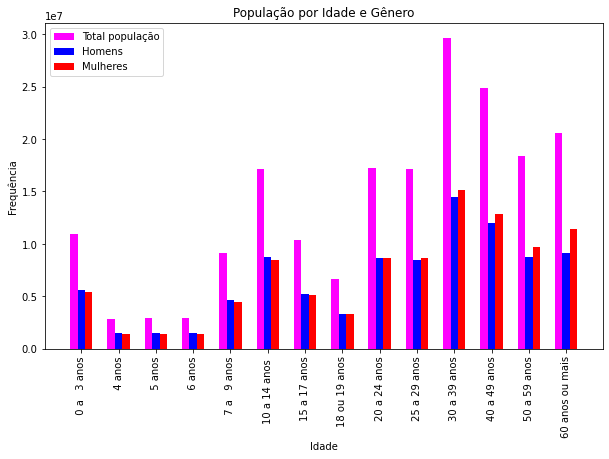

In [15]:
# Define faixas etárias a serem impressas abaixo de cada barra
rotulos_x = tab1.iloc[0:14, 0]

largura_barra = 0.2
indices = list(range(len(total_pop)))

# Plota barras para total, homem e mulher
plt.figure(figsize=(10, 6))
plt.bar([i - largura_barra for i in indices], total_pop, largura_barra, color='magenta', label='Total Pop')
plt.bar(indices, total_homem, largura_barra, color='blue', label='Total H')
plt.bar([i + largura_barra for i in indices], total_mulher , largura_barra, color='red', label='Total M')

# Define rótulos do gráfico
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('População por Idade e Gênero')
plt.xticks(indices, rotulos_x, rotation=90)
plt.legend(['Total população', 'Homens', 'Mulheres'], loc='upper left')

plt.show()

O gráfico de barras acima visualizado é equivalente à pirâmide etária brasileira, e não segue nenhuma distribuição específica, mas permiti-nos identificar que, de forma geral, o número de mulheres e de homens na população é bem semelhante, divergindo a partir dos 30 anos, quando passam a haver mais mulheres que homens na população.

### 3.3.1 Frequência escolar em razão da idade

#### 3.3.1.1 População que frequenta a escola
Primeiramente, plotaremos um gráfico de barras trazendo a relação entre a idade e a frequência escolar, de acordo com o sexo e de forma total. Note que o eixo horizontal adota diferentes faixas de idade, enquanto o eixo vertical adota o percentual de pessoas na dada faixa de idade que frequenta a escola.

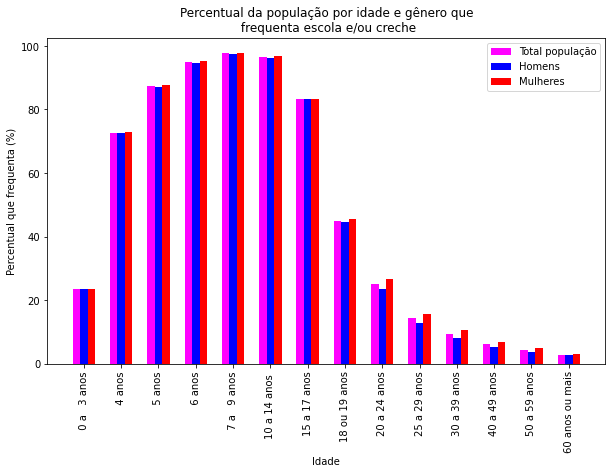

In [18]:
largura_barra = 0.2
indices = list(range(len(freq_pop)))

# Plota barras para total, homem e mulher
plt.figure(figsize=(10, 6))
plt.bar([i - largura_barra for i in indices], freq_pop, largura_barra, color='magenta', label='Total Pop')
plt.bar(indices, freq_homem, largura_barra, color='blue', label='Total H')
plt.bar([i + largura_barra for i in indices], freq_mulher , largura_barra, color='red', label='Total M')

# Define rótulos do gráfico
plt.xlabel('Idade')
plt.ylabel('Percentual que frequenta (%)')
plt.title('Percentual da população por idade e gênero que\n frequenta escola e/ou creche')
plt.xticks(indices, rotulos_x, rotation=90)
plt.legend(['Total população', 'Homens', 'Mulheres'], loc='upper right')

plt.show()

Analisando o gráfico, nota-se que este sobe rapidamente para faixas de idade acima dos 3 anos de idade, chegando a seu máxima na faixa de 7 a 9 anos, e decaindo rapidamente a partir de então. Nota-se também que a frequência escolar é em grande parte independente do sexo, com um pequeno crescimento do percentual de mulheres em relação ao de homens percebido a partir dos 20 anos.

A partir do gráfico, verifica-se que a presença no ensino fundamental é relativamente alta (acima de 90%), decaindo significativamente ao avançar para o ensino médio (agora prócimo de 80%).

Também é perceptível a semelhança com a distribuição qui-quadrado, a qual pode ser analisada posteriormente.

#### 3.3.1.2 População que já frequentou a escola
A seguir, tomaremos um novo gráfico de barras trazendo a população que já frequentou a escola, nos mesmos moldes do anterior.

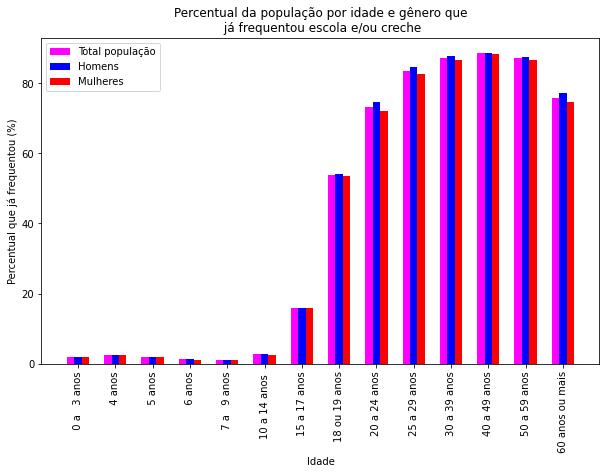

In [19]:
indices = list(range(len(jafreq_pop)))

# Plota barras para total, homem e mulher
plt.figure(figsize=(10, 6))
plt.bar([i - largura_barra for i in indices], jafreq_pop, largura_barra, color='magenta', label='Total Pop')
plt.bar(indices, jafreq_homem, largura_barra, color='blue', label='Total H')
plt.bar([i + largura_barra for i in indices], jafreq_mulher , largura_barra, color='red', label='Total M')

# Define rótulos do gráfico
plt.xlabel('Idade')
plt.ylabel('Percentual que já frequentou (%)')
plt.title('Percentual da população por idade e gênero que\n já frequentou escola e/ou creche')
plt.xticks(indices, rotulos_x, rotation=90)
plt.legend(['Total população', 'Homens', 'Mulheres'], loc='upper left')

plt.show()

A partir do exposto no gráfico, vê-se que o percentual da população que já frequentou a escola é extremamente baixo antes dos 15 anos, condizente com o último gráfico analisado, dado que grande parte encontra-se frequentando ativamente a escola. No entanto, a partir dos 15 anos, cresce rapidamente o número de pessoas que já frequentou a escola, chegando a seu máximo na faixa dos 40 a 49 anos. Sendo assim, identifica-se uma certa taxa de evasão escolar no ensino médio, além da prevalência de um baixo número de pessoas a continuar os estudos após o ensino básico. Por fim, uma queda na faixa acima dos 60 anos indica um conjunto de pessoas que nunca frequentou a escola, o que pode ser verificado no gráfico a seguir.

Percebe-se uma aproximação de uma distribuição normal com média em 40 anos.

#### 3.3.1.3 População que nunca frequentou a escola
Novamente, tomaremos um novo gráfico de barras trazendo a população que nunca frequentou a escola, nos mesmos moldes já adotados.

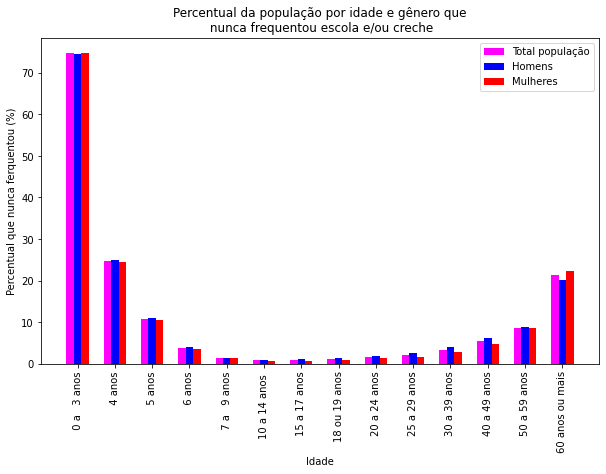

In [20]:
indices = list(range(len(nfreq_pop)))

# Plota barras para total, homem e mulher
plt.figure(figsize=(10, 6))
plt.bar([i - largura_barra for i in indices], nfreq_pop, largura_barra, color='magenta', label='Total Pop')
plt.bar(indices, nfreq_homem, largura_barra, color='blue', label='Total H')
plt.bar([i + largura_barra for i in indices], nfreq_mulher , largura_barra, color='red', label='Total M')

# Define rótulos do gráfico
plt.xlabel('Idade')
plt.ylabel('Percentual que nunca ferquentou (%)')
plt.title('Percentual da população por idade e gênero que\n nunca frequentou escola e/ou creche')
plt.xticks(indices, rotulos_x, rotation=90)
plt.legend(['Total população', 'Homens', 'Mulheres'], loc='upper right')

plt.show()

Com este gráfico, constata-se que um baixo percentual de crianças vai à creche antes do 3 anos, aumentando para os 4 e 5 anos, mas ainda demonstrando uma evasão notável. Outro ponto interessante a se analisar é o percentual populacional que nunca compareceu à escola dentre as pessoas a partir dos 60 anos, indicando as mudanças do sistema educacional desde 1950 e a crescente importância atribuída à educação.

### 3.3.2 Frequência escolar em razão da renda

#### 3.3.2.1 População que frequenta ou já frequentou a escola
Avaliaremos aqui, na forma de um gráfico de barras, a relação entre renda e escolaridade. No eixo vertical são separadas distintas classes de renda às quais a população pertence, enquanto no eixo vertical é mostrado o percentual da população dentro de tal nível de renda que frequenta ou já frequentou a escola.

A realização de análises separadas para cada situação de acesso à escola, como realizado anteriormente, foi descartada neste caso, pois a informação de maior relevância constitui de fato como o acesso, ou ausência deste, ao ambiente escolar. Portanto, segue o gráfico.

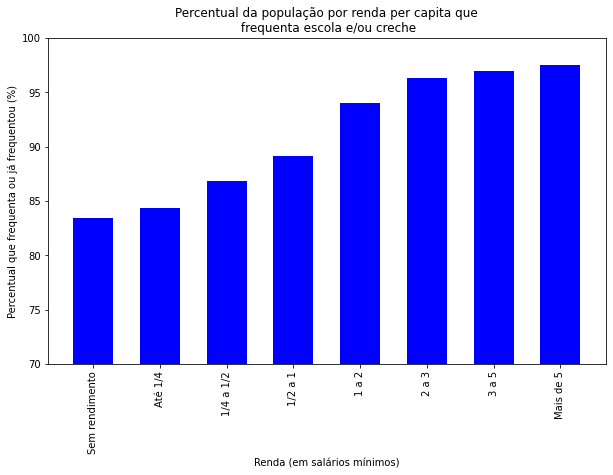

In [21]:
rotulos_x_renda = "Sem rendimento", "Até 1/4", "1/4 a 1/2", "1/2 a 1", "1 a 2", "2 a 3", "3 a 5", "Mais de 5"

largura_barra = 0.6
lista_freq = [sum(np.multiply(np.add(renda_freq, renda_jafreq), renda_total)[x]) / sum(renda_total[x]) for x in range(8)]
indices_renda = list(range(len(lista_freq)))

# Plota barras
plt.figure(figsize=(10, 6))
plt.bar(indices_renda, lista_freq, largura_barra, color='blue', label='Total H')

# Define rótulos do gráfico
plt.xlabel('Renda (em salários mínimos)')
plt.ylabel('Percentual que frequenta ou já frequentou (%)')
plt.title('Percentual da população por renda per capita que\n frequenta escola e/ou creche')
plt.ylim([70,100])
plt.xticks(indices_renda, rotulos_x_renda, rotation=90)

plt.show()

A partir deste gráfico, verifica-se uma relação quase diretamente proporcional entre o nível de renda e o percentual da população com acesso ao ambiente escolar, relação que pode ser analisada mais a fundo posteriormente.

## 3.3 Análise de Correlações

Fazer gráficos de relação entre variáveis e calcular correlação

# 4. Conclusão

# 5. Referências